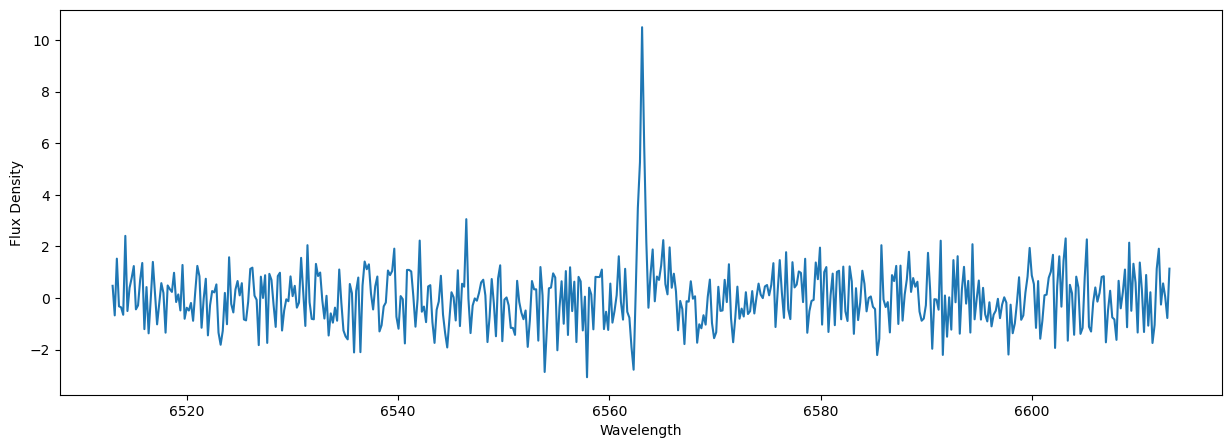

In [1]:
import numpy as np
import matplotlib.pyplot as plt
wl = np.linspace(6500, 6600, 500) + 13
flux = np.zeros_like(wl)
flux[253] = 0.10
flux[252] = 1.1
flux[251] = 5.01
flux[250] = 10.0
flux[249] = 4.95
flux[248] = 1.2
flux[247] = 0.11

noise = np.random.normal(0, 1, size=flux.size)
flux += noise

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(wl, flux)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density');

(6550.0, 6570.0)

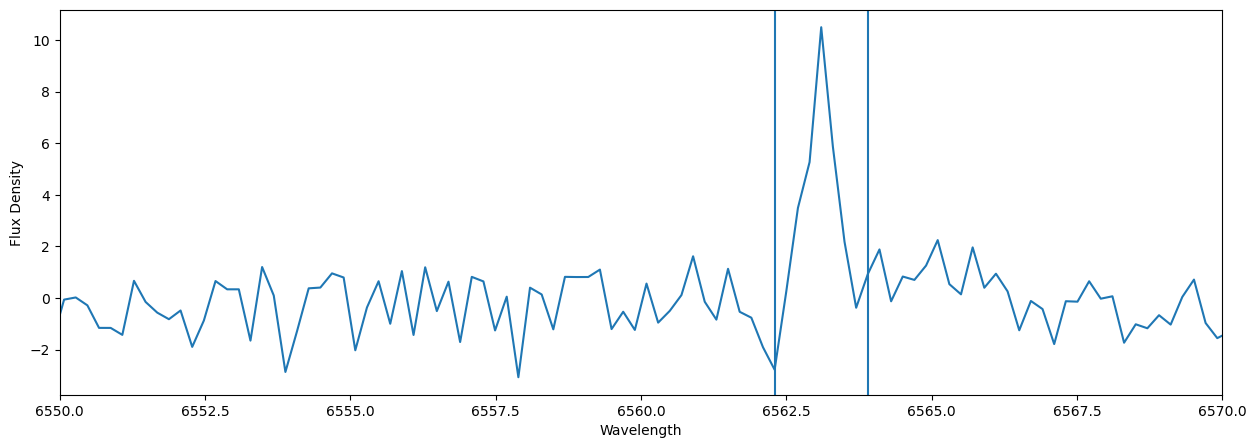

In [2]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(wl, flux)

ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density')
ax.axvline(wl[246])
ax.axvline(wl[254])
ax.set_xlim(6550, 6570)

### Trapezoid and Simpson's Rule

In [6]:
from scipy.integrate import trapezoid, simpson

sub_wl = wl[246:254] # range chosen by eye
sub_fl = flux[246:254]

integral_trapz = trapezoid(sub_fl, sub_wl)
integral_simps = simpson(sub_fl, x=sub_wl)

print(f'Trapezoid Rule: {integral_trapz:.4f}')
print(f'Simpsons Rule: {integral_simps:.4f}')


Trapezoid Rule: 5.2031
Simpsons Rule: 5.0308


### Gaussian Approximation

In [8]:
def gauss(x, amp, loc, sigma):
    return amp * np.exp(-np.power(x-loc, 2.0)/(2*np.power(sigma, 2.0)))

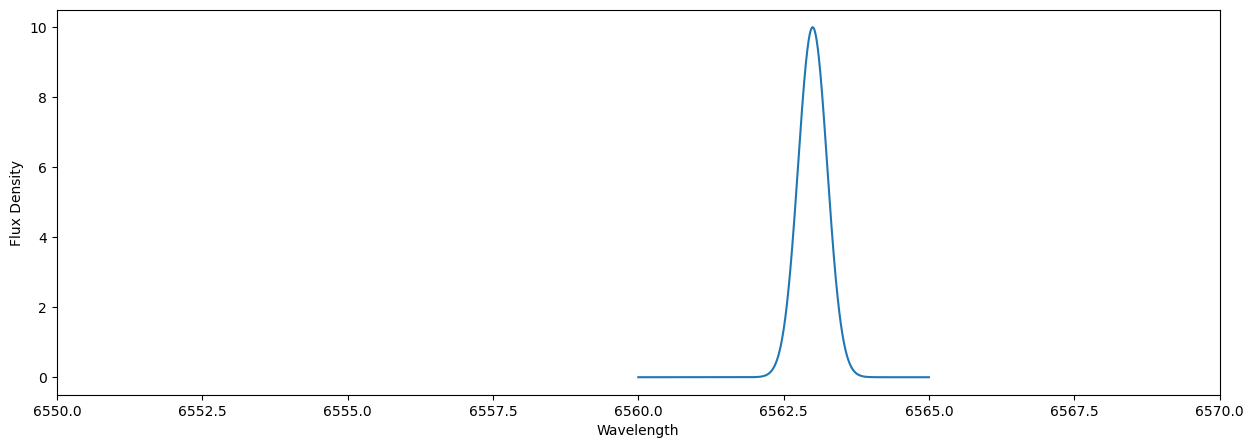

In [11]:
xx = np.linspace(6560, 6565, 1000)
gauss_test = gauss(xx, 10, 6563, 0.25)

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(xx, gauss_test)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density')
ax.set_xlim(6550, 6570);

### Integration with `quad`

In [12]:
from scipy.integrate import quad

res = quad(func=gauss, a=6560, b=6565, args=(10, 6563, 0.25))
print(f'Numerical Integral with Quad: {res[0]:.4f}')

Numerical Integral with Quad: 6.2666


In [13]:
true_integral = 10 * np.sqrt(2 * np.pi * 0.25**2)
true_integral

6.2665706865775